In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load data

In [15]:
FILE_PATH = "../output/BD50/"
parameters = ['R_nought','infectious_time','transmission_rate']

In [16]:
lf = ['LF1','LF2']
latent = np.loadtxt(FILE_PATH+"latent_space.out",delimiter=",")
df = pd.DataFrame(data=latent,index=range(0,len(latent)),columns=lf)
for param in parameters:
    y = np.loadtxt(FILE_PATH+"y_{}.out".format(param),delimiter=",")
    df[param] = y[:,0]
df = df[parameters+lf]

## Lower dimensional representation of tree encodings in latent space

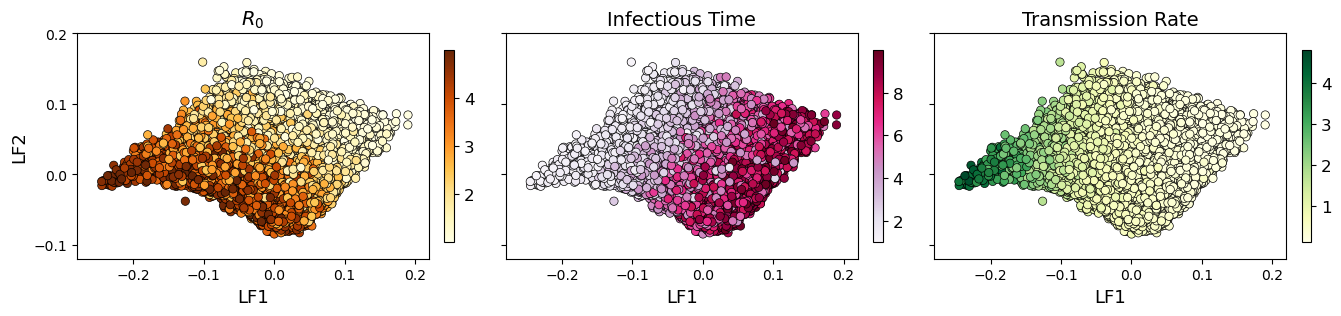

In [81]:
colors = ['YlOrBr', 'PuRd', 'YlGn']
titles = ["$R_0$", "Infectious Time", "Transmission Rate"]

fig, axes = plt.subplots(1,3,sharex=True, sharey=True, figsize=(16,3), dpi=100)

for i,param in enumerate(parameters):

    cmap = sns.color_palette(colors[i], as_cmap=True)
    ax = axes[i]
    sns.scatterplot(data=df, x=lf[0], y=lf[1],hue=param, 
                  palette=cmap, ax=ax, edgecolor="black")
    ax.set_xlim(-0.28,0.22)
    ax.set_ylim(-0.12,0.18)
    plt.yticks(np.arange(-0.1,0.2,0.1))

    ax.set_aspect(1)
    ax.set_xlabel(lf[0], fontsize=13)
    ax.set_ylabel(lf[1], fontsize=13)
    ax.set_title(titles[i], fontsize=14)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(df[param].min(), df[param].max()))
    sm.set_array([])
    ax.get_legend().remove()
    cbar = plt.colorbar(sm,fraction=0.04, pad=0.04, ax=ax, shrink=.85)
    cbar.ax.tick_params(labelsize=12) 
    
    # cbar.ax.set_title(param, fontsize=12)
    # cbar.set_label(param, fontsize=12)
plt.subplots_adjust(wspace=0.12,  hspace=0.12)
pass

# save
plt.savefig("../plots/latent_space.pdf", bbox_inches='tight', format="pdf", dpi=50)

## Pairwise relationships between parameters of interest and latent factors 

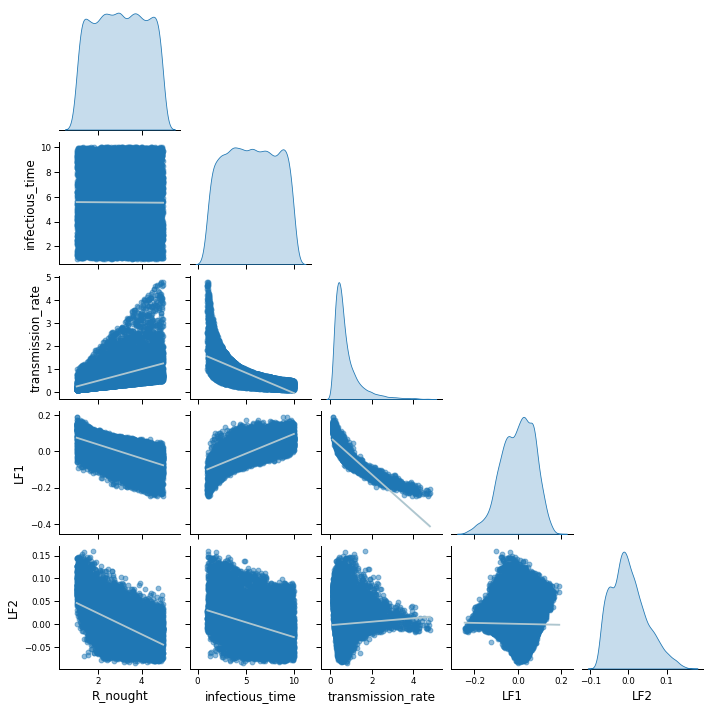

In [11]:
sns.set_context("paper", rc={"axes.labelsize":12})
sns_pp = sns.pairplot(df, kind='reg', diag_kind='kde', height=2, corner=True,
                      plot_kws={'line_kws':{'color':'#aec6cf'},'scatter_kws': {'alpha': 0.5}})
pass